<a href="https://colab.research.google.com/github/PRASADHAJARgw/Spotify_song_recomender/blob/main/Spotify_Nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import gdown
# https://drive.google.com/file/d/1JhMQl_ZKg7PQjB-I_I41ngH1fLgFPlz_/view?usp=drive_link
file_id = "1JhMQl_ZKg7PQjB-I_I41ngH1fLgFPlz_"
download_url = f"https://drive.google.com/uc?id={file_id}"

output = "data.csv"
gdown.download(download_url, output, quiet=False)
pd.set_option('display.max_columns', None)
df = pd.read_csv("data.csv", encoding='ISO-8859-1')

Downloading...
From (original): https://drive.google.com/uc?id=1JhMQl_ZKg7PQjB-I_I41ngH1fLgFPlz_
From (redirected): https://drive.google.com/uc?id=1JhMQl_ZKg7PQjB-I_I41ngH1fLgFPlz_&confirm=t&uuid=ad65f9a5-9250-489d-9bd5-ccb07cb9e3ab
To: /content/data.csv
100%|██████████| 42.7M/42.7M [00:00<00:00, 74.4MB/s]
<ipython-input-1-60cefe92a364>:11: DtypeWarning: Columns (9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv", encoding='ISO-8859-1')


In [2]:
df = pd.read_csv("data.csv", encoding='ISO-8859-1')
df.head()

<ipython-input-2-529356daea9c>:1: DtypeWarning: Columns (9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv", encoding='ISO-8859-1')


,id,artists,available_markets,disc_number,duration_ms.x,explicit,href,is_local,name,popularity,preview_url,track_number,type.x,uri.x,album.album_type,album.artists,album.available_markets,album.href,album.id,album.images,album.name,album.release_date,album.release_date_precision,album.total_tracks,album.type,album.uri,album.external_urls.spotify,external_ids.isrc,external_urls.spotify,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type.y,uri.y,track_href,analysis_url,duration_ms.y,time_signature
0,000xQL6tZNLJzIrtIgxqSl,https://api.spotify.com/v1/artists/5ZsFI1h6hId...,"AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, BR...",1,188490,FALSE,https://api.spotify.com/v1/tracks/000xQL6tZNLJ...,FALSE,Still Got Time (feat. PARTYNEXTDOOR),63,https://p.scdn.co/mp3-preview/cc28d32b3c106428...,1,track,spotify:track:000xQL6tZNLJzIrtIgxqSl,single,https://api.spotify.com/v1/artists/5ZsFI1h6hId...,"AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, BR...",https://api.spotify.com/v1/albums/2kGUeTGnkLOY...,2kGUeTGnkLOYlinKRJe47G,"640, 300, 64, https://i.scdn.co/image/ab67616d...",Still Got Time (feat. PARTYNEXTDOOR),2017-03-23,day,1,album,spotify:album:2kGUeTGnkLOYlinKRJe47G,https://open.spotify.com/album/2kGUeTGnkLOYlin...,USRC11700675,https://open.spotify.com/track/000xQL6tZNLJzIr...,0.748,0.627,7.0,-6.029,1.0,0.0639,0.131000,0.000000,0.0852,0.524,120.963,audio_features,spotify:track:000xQL6tZNLJzIrtIgxqSl,https://api.spotify.com/v1/tracks/000xQL6tZNLJ...,https://api.spotify.com/v1/audio-analysis/000x...,188491.0,4.0
1,001UkMQHw4zXfFNdKpwXAF,https://api.spotify.com/v1/artists/0XKOBt59crn...,"AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, BR...",1,191053,FALSE,https://api.spotify.com/v1/tracks/001UkMQHw4zX...,FALSE,Brand New Man - with Luke Combs,68,https://p.scdn.co/mp3-preview/20f3865bebd50d0f...,1,track,spotify:track:001UkMQHw4zXfFNdKpwXAF,album,https://api.spotify.com/v1/artists/0XKOBt59crn...,"AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, BR...",https://api.spotify.com/v1/albums/0U3nI78LUpAw...,0U3nI78LUpAwprraUf7vAS,"640, 300, 64, https://i.scdn.co/image/ab67616d...",Reboot,2019-04-05,day,12,album,spotify:album:0U3nI78LUpAwprraUf7vAS,https://open.spotify.com/album/0U3nI78LUpAwprr...,USAN21800051,https://open.spotify.com/track/001UkMQHw4zXfFN...,0.573,0.846,7.0,-4.866,1.0,0.0344,0.003720,0.000079,0.2900,0.562,127.061,audio_features,spotify:track:001UkMQHw4zXfFNdKpwXAF,https://api.spotify.com/v1/tracks/001UkMQHw4zX...,https://api.spotify.com/v1/audio-analysis/001U...,191053.0,4.0
2,003FTlCpBTM4eSqYSWPv4H,https://api.spotify.com/v1/artists/3vAaWhdBR38...,"AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, BR...",1,233266,FALSE,https://api.spotify.com/v1/tracks/003FTlCpBTM4...,FALSE,"Swing, Swing",67,NaN,3,track,spotify:track:003FTlCpBTM4eSqYSWPv4H,album,https://api.spotify.com/v1/artists/3vAaWhdBR38...,"AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, BR...",https://api.spotify.com/v1/albums/0TvOeelcHQXY...,0TvOeelcHQXYgPcyQiLhyR,"640, 300, 64, https://i.scdn.co/image/ab67616d...",The All-American Rejects,2002-10-15,day,11,album,spotify:album:0TvOeelcHQXYgPcyQiLhyR,https://open.spotify.com/album/0TvOeelcHQXYgPc...,USDW10200529,https://open.spotify.com/track/003FTlCpBTM4eSq...,0.553,0.717,7.0,-5.857,1.0,0.0318,0.000065,0.128000,0.0385,0.318,127.947,audio_features,spotify:track:003FTlCpBTM4eSqYSWPv4H,https://api.spotify.com/v1/tracks/003FTlCpBTM4...,https://api.spotify.com/v1/audio-analysis/003F...,233267.0,4.0
3,003vvx7Niy0yvhvHt4a68B,https://api.spotify.com/v1/artists/0C0XlULifJt...,"AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, BR...",1,222973,FALSE,https://api.spotify.com/v1/tracks/003vvx7Niy0y...,FALSE,Mr. Brightside,80,NaN,2,track,spotify:track:003vvx7Niy0yvhvHt4a68B,album,https://api.spotify.com/v1/artists/0C0XlULifJt...,"AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, BR...",https://api.spotify.com/v1/albums/4piJq7R3gjUO...,4piJq7R3gjUOxnYs6lDCTg,"640, 300, 64, https://i.scdn.co/image/ab67616d...",Hot Fuss,2004,y

In [3]:
# df = pd.read_csv("data.csv", encoding='cp1252')

In [4]:
df.dropna(inplace=True)

In [5]:
a=df["artists"].head(1)
a

,artists
0,https://api.spotify.com/v1/artists/5ZsFI1h6hId...


In [6]:
def clean_artists_column(artist_string):
    if pd.isna(artist_string):
        return []

    items = [item.strip() for item in artist_string.split(",")]

    prefixes_to_remove = [
        "https://api.spotify.com/v1/artists/",
        "spotify:artist:",
        "https://open.spotify.com/artist/"
    ]

    cleaned_items = []
    for item in items:
        for prefix in prefixes_to_remove:
            if item.startswith(prefix):
                item = item.replace(prefix, "")
        cleaned_items.append(item)

    final_items = [item for item in cleaned_items if item.lower() != "artist"]
    seen = set()
    unique_items = []
    for item in final_items:
        if item not in seen:
            unique_items.append(item)
            seen.add(item)

    return unique_items
df['updated_artists'] = df['artists'].apply(clean_artists_column)

In [7]:
df['available_markets'] = df['available_markets'].str.split(', ')
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
market_dummies = pd.DataFrame(mlb.fit_transform(df['available_markets']),
                              columns=mlb.classes_,
                              index=df.index)
df = df.join(market_dummies)

In [8]:
df.columns
df.drop(columns=["artists","uri.x","is_local","type.x","href","album.artists","album.href","album.images","album.uri","album.external_urls.spotify","external_urls.spotify","uri.y","track_href","analysis_url","preview_url","album.available_markets","available_markets"],inplace=True)

In [9]:
df.head()

,id,disc_number,duration_ms.x,explicit,name,popularity,track_number,album.album_type,album.id,album.name,album.release_date,album.release_date_precision,album.total_tracks,album.type,external_ids.isrc,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type.y,duration_ms.y,time_signature,updated_artists,AD,AE,AL,AR,AT,AU,BA,BE,BG,BH,BO,BR,BY,CA,CH,CL,CO,CR,CY,CZ,DE,DK,DO,DZ,EC,EE,EG,ES,FI,FR,GB,GR,GT,HK,HN,HR,HU,ID,IE,IL,IN,IS,IT,JO,JP,KW,KZ,LB,LI,LT,LU,LV,MA,MC,MD,ME,MK,MT,MX,MY,NI,NL,NO,NZ,OM,PA,PE,PH,PL,PS,PT,PY,QA,RO,RS,RU,SA,SE,SG,SI,SK,SV,TH,TN,TR,TW,UA,US,UY,VN,XK,ZA
0,000xQL6tZNLJzIrtIgxqSl,1,188490,FALSE,Still Got Time (feat. PARTYNEXTDOOR),63,1,single,2kGUeTGnkLOYlinKRJe47G,Still Got Time (feat. PARTYNEXTDOOR),2017-03-23,day,1,album,USRC11700675,0.748,0.627,7.0,-6.029,1.0,0.0639,0.13100,0.000000,0.0852,0.5240,120.963,audio_features,188491.0,4.0,"[5ZsFI1h6hIdQRw2ti0hz81, 2HPaUgqeutzr3jx5a9WyD...",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,001UkMQHw4zXfFNdKpwXAF,1,191053,FALSE,Brand New Man - with Luke Combs,68,1,album,0U3nI78LUpAwprraUf7vAS,Reboot,2019-04-05,day,12,album,USAN21800051,0.573,0.846,7.0,-4.866,1.0,0.0344,0.00372,0.000079,0.2900,0.5620,127.061,audio_features,191053.0,4.0,"[0XKOBt59crntr7HQXXO8Yz, 718COspgdWOnwOFpJHRZH...",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,007EFIByaEW4dgEcIbfBg9,1,170626,FALSE,Hasta Que un dÃ­,58,1,single,6eeRsUeGzjjg0MHek4DmcR,Hasta Que un dÃ­,2018-10-25,day,1,album,QZ85W1701032,0.684,0.564,10.0,-6.852,1.0,0.0297,0.42500,0.000000,0.1520,0.3680,134.958,audio_features,170627.0,4.0,"[1dKdetem2xEmjgvyymzytS, Grupo Firme]",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,009thiR2SWpG6jXqXYX2AT,1,152784,FALSE,Cuantas Amantes,53,1,single,3YKLNFNyg3a1ZSYO9z3EHr,Cuantas Amantes,2020-10-30,day,1,album,SE5IB2001952,0.754,0.169,4.0,-14.999,0.0,0.0540,0.96500,0.872000,0.1140,0.4220,93.952,audio_features,152784.0,4.0,"[4qxGMBS25xDymfWz3kkKOE, Xavier Suarez]",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8,00bOuKgzbRkOHmgCAL7ChZ,1,271680,FALSE,Zoning,50,1,single,3BgFl5yBvQnuJCvESIrrSV,Zoning,2019-09-06,day,1,album,GBKPL1961103,0.629,0.877,7.0,-4.642,1.0,0.0402,0.02890,0.408000,0.1060,0.0369,104.978,audio_features,271680.0,4.0,"[0QJKELJZZuLAjqLOOixJm5, 28j8lBWDdDSHSSt5oPlsX...",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [10]:
df["album.release_date_precision"].value_counts()

,count
album.release_date_precision,
day,11246
year,544
month,13


In [11]:
df.dropna(inplace=True)

In [12]:
# for col in df_encoded.columns:
#     print(f"Unique values in column '{col}': {df_encoded[col].nunique()}")


In [13]:
# # for col in df_encoded.columns:
#     print(f"NAN values in column '{col}': {df_encoded[col].isna().sum()}")

In [14]:
features = [
    'danceability', 'energy', 'valence', 'tempo',
    'acousticness', 'instrumentalness', 'liveness', 'speechiness'
]

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# # Load your data
# df = pd.read_csv('your_dataset.csv')  # or however you have it

# Keep only the needed features
X = df[features].copy()

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras import layers, models

input_dim = X_scaled.shape[1]

# Autoencoder
input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(64, activation='relu')(input_layer)
encoded = layers.Dense(32, activation='relu')(encoded)
embedding = layers.Dense(16, activation='relu', name='embedding_layer')(encoded)

decoded = layers.Dense(32, activation='relu')(embedding)
decoded = layers.Dense(64, activation='relu')(decoded)
output_layer = layers.Dense(input_dim, activation='linear')(decoded)

autoencoder = models.Model(inputs=input_layer, outputs=output_layer)

autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(X_scaled, X_scaled, epochs=30, batch_size=32, verbose=1)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 596.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 78.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 108.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 105.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 110.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.2 MB/s eta 0:00:00
Epoch 1/30
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4504
Epoch 2/30
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0100
Epoch 3/30
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0060
Epoch 4/30
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0043
Epoch 5/30
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0031
Epoch 6/30
369/369 ━━━━━━━━━━━━━━━

In [19]:
embedding_model = models.Model(inputs=autoencoder.input,
                               outputs=autoencoder.get_layer('embedding_layer').output)

song_embeddings = embedding_model.predict(X_scaled)

369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step


In [20]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def recommend_similar_songs(song_index, top_n=5):
    similarities = cosine_similarity(
        [song_embeddings[song_index]],
        song_embeddings
    )[0]

    # Exclude the song itself
    similar_indices = np.argsort(similarities)[::-1][1:top_n+1]
    return df.iloc[similar_indices][['name', 'updated_artists', 'album.name']]

In [21]:
def recommend_similar_songs(song_index, top_n=5):
    similarities = cosine_similarity(
        [song_embeddings[song_index]],
        song_embeddings
    )[0]

    similar_indices = np.argsort(similarities)[::-1][1:top_n+1]
    return df.iloc[similar_indices][['name', 'updated_artists', 'album.name']]

# Example: Recommend songs similar to the first track
recommend_similar_songs(0)


,name,updated_artists,album.name
17536,I'm Just Feelin' (Du Du Du),"[5rGrDvrLOV2VV8SCFVGWlj, 4ehtJnVumNf6xzSCDk8aL...",I'm Just Feelin' (Du Du Du)
13120,Loving Is Easy,"[7pbDxGE6nQSZVfiFdq9lOL, 4gHcu2JoaXJ0mV4aNPCd7...",Loving Is Easy
17504,Pro's and Con's,"[1e0qSryQI4zCOcBKrSMBYe, Dannyland]",Scattered Thoughts
914,React,"[6wPhSqRtPu1UhRCDX5yaDJ, The Pussycat Dolls]",React
18845,Lay It on Me,"[10exVja0key0uqUkk6LJRT, Vance Joy]",Nation of Two


In [22]:
def recommend_by_name(song_name, top_n=5):
    song_index = df[df['name'] == song_name].index[0]
    return recommend_similar_songs(song_index, top_n=top_n)

# Try:
recommend_by_name("Still Got Time (feat. PARTYNEXTDOOR)")

,name,updated_artists,album.name
17536,I'm Just Feelin' (Du Du Du),"[5rGrDvrLOV2VV8SCFVGWlj, 4ehtJnVumNf6xzSCDk8aL...",I'm Just Feelin' (Du Du Du)
13120,Loving Is Easy,"[7pbDxGE6nQSZVfiFdq9lOL, 4gHcu2JoaXJ0mV4aNPCd7...",Loving Is Easy
17504,Pro's and Con's,"[1e0qSryQI4zCOcBKrSMBYe, Dannyland]",Scattered Thoughts
914,React,"[6wPhSqRtPu1UhRCDX5yaDJ, The Pussycat Dolls]",React
18845,Lay It on Me,"[10exVja0key0uqUkk6LJRT, Vance Joy]",Nation of Two


In [23]:
def recommend_by_name(song_name, top_n=5):
    matches = df[df['name'].str.lower() == song_name.lower()]
    if matches.empty:
        return f"Song '{song_name}' not found."
    song_index = matches.index[0]
    return recommend_similar_songs(song_index, top_n=top_n)

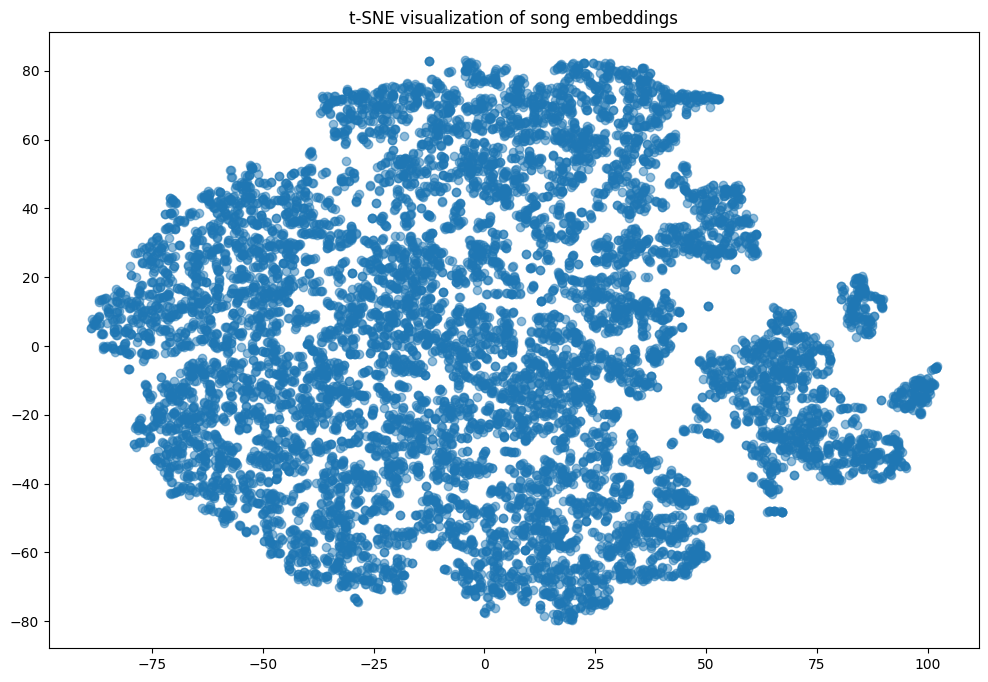

In [24]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
reduced = tsne.fit_transform(song_embeddings)

plt.figure(figsize=(12, 8))
plt.scatter(reduced[:, 0], reduced[:, 1], alpha=0.5)
plt.title("t-SNE visualization of song embeddings")
plt.show()

In [25]:
loss = autoencoder.evaluate(X_scaled, X_scaled)
print(f"Autoencoder reconstruction loss: {loss:.4f}")

369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.5021e-04  
Autoencoder reconstruction loss: 0.0002


In [26]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(song_embeddings)

score = silhouette_score(song_embeddings, labels)
print(f"Silhouette score: {score:.4f}")

Silhouette score: 0.1894


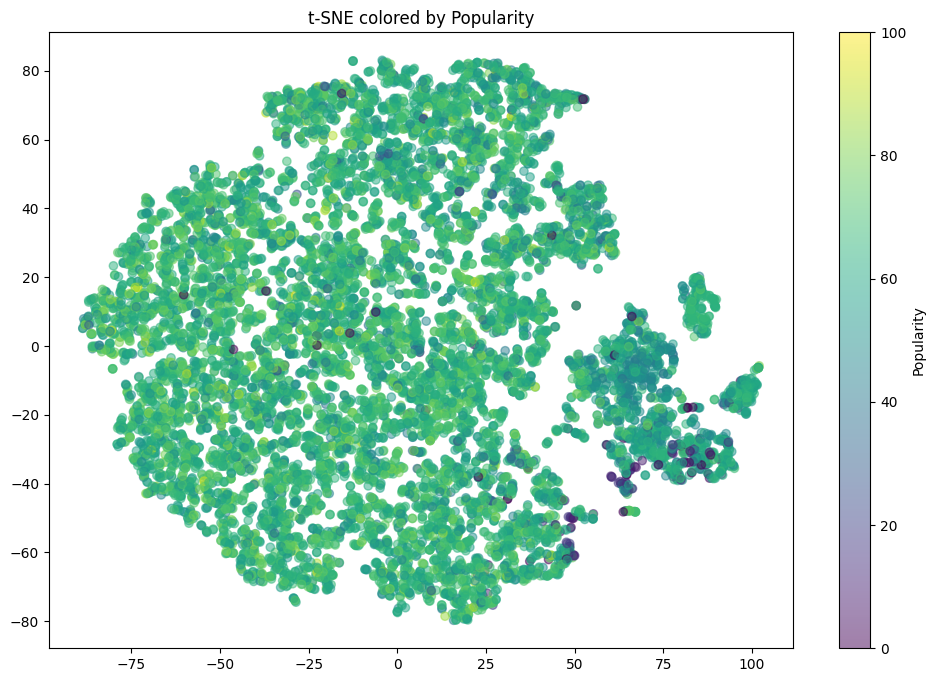

In [27]:
colors = pd.to_numeric(df['popularity'], errors='coerce')  # converts strings to numbers
plt.figure(figsize=(12, 8))
plt.scatter(reduced[:, 0], reduced[:, 1], c=colors, cmap='viridis', alpha=0.5)
plt.title("t-SNE colored by Popularity")
plt.colorbar(label='Popularity')
plt.show()

In [32]:
df['description'] = (
    df['name'] + ' by ' + df['updated_artists'].apply(lambda x: ', '.join(x)) +
    '. Energetic: ' + df['energy'].round(2).astype(str) +
    ', Danceable: ' + df['danceability'].round(2).astype(str) +
    ', Mood: ' + df['valence'].round(2).astype(str)
)


In [33]:
!pip install sentence_transformers
!pip install tf-keras
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')  # Lightweight, effective

song_embeddings = model.encode(df['description'].tolist(), show_progress_bar=True)

Batches:   0%|          | 0/369 [00:00<?, ?it/s]

In [34]:
def recommend_by_prompt(prompt, top_n=5):
    query_embedding = model.encode([prompt])[0]
    sims = cosine_similarity([query_embedding], song_embeddings)[0]
    top_indices = sims.argsort()[::-1][:top_n]
    return df.iloc[top_indices][['name', 'updated_artists', 'album.name']]

In [35]:
# recommend_by_prompt("happy upbeat party song", top_n=5)
# # recommend_by_prompt("something mellow and sad", top_n=5)
# # recommend_by_prompt("romantic slow dance", top_n=5)
# recommend_by_prompt("Indian sad song", top_n=5)
recommend_by_prompt("Indian happy  song", top_n=5)

,name,updated_artists,album.name
8569,Be Happy - Remix,"[3DKkhRCGOG4e8IUPYFPfWs, 2cFrymmkijnjDg9SS92EP...",Be Happy (Remix)
3101,"Dil Diyan Gallan (From ""Tiger Zinda Hai"")","[2oSONSC9zQ4UonDKnLqksx, Atif Aslam]",YRF Top 10 - Rewind
6993,Happy Does,"[3grHWM9bx2E9vwJCdlRv9O, Kenny Chesney]",Here And Now
3681,Be Happy,"[3DKkhRCGOG4e8IUPYFPfWs, Dixie DâAmelio, 3DK...",Be Happy
2546,Aye Dekhe Jaa,"[4YRxDV8wJFPHPTeXepOstw, Arijit Singh]",Top 20 of 2020


In [36]:
prompt = "Indian sad song"  # or any test phrase

In [37]:
query_embedding = model.encode([prompt])[0]
sims = cosine_similarity([query_embedding], song_embeddings)[0]

In [38]:
country_bias = 0.15  # Strength of boost; tune as needed
bias = df['IN'] * country_bias  # 1 if in India, else 0
biased_scores = sims + bias

In [40]:
top_n = 5  # or however many results you want
top_indices = biased_scores.argsort()[::-1][:top_n]
results = df.iloc[top_indices][['name', 'updated_artists', 'album.name', 'description']]

In [41]:
def recommend_biased_by_country(prompt, country_code='IN', country_boost=0.15, top_n=5):
    query_embedding = model.encode([prompt])[0]
    sims = cosine_similarity([query_embedding], song_embeddings)[0]

    # Add country bias softly
    bias = df[country_code] * country_boost
    biased_scores = sims + bias

    top_indices = biased_scores.argsort()[::-1][:top_n]
    return df.iloc[top_indices][['name', 'updated_artists', 'album.name', 'description']]

In [42]:
recommend_biased_by_country("Arijit Singh", country_code='IN', country_boost=0.9, top_n=5)

,name,updated_artists,album.name,description
2546,Aye Dekhe Jaa,"[4YRxDV8wJFPHPTeXepOstw, Arijit Singh]",Top 20 of 2020,"Aye Dekhe Jaa by 4YRxDV8wJFPHPTeXepOstw, Ariji..."
18118,Ore Mon Udashi,"[4YRxDV8wJFPHPTeXepOstw, Arijit Singh]",Bangla Emotional Hits,"Ore Mon Udashi by 4YRxDV8wJFPHPTeXepOstw, Arij..."
9768,Abar Phire Ele,"[4YRxDV8wJFPHPTeXepOstw, Arijit Singh]",Top 20 of 2020,"Abar Phire Ele by 4YRxDV8wJFPHPTeXepOstw, Arij..."
10609,Zaalima,"[4YRxDV8wJFPHPTeXepOstw, 3xU8YsNNkmWSPewlB18NU...",Raees,"Zaalima by 4YRxDV8wJFPHPTeXepOstw, 3xU8YsNNkmW..."
16273,Chantaje (feat. Maluma),"[0EmeFodog0BfCgMzAIvKQp, 1r4hJ1h58CWwUQe3MxPua...",El Dorado,Chantaje (feat. Maluma) by 0EmeFodog0BfCgMzAIv...


In [43]:
pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=e529278ff0aea2c3221415b8543119c937367ba50c2f9f9f89be52111c107a67
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


In [44]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from langdetect import detect, DetectorFactory

DetectorFactory.seed = 0  # Make results consistent

In [45]:
language_to_country = {
    'hi': 'IN',
    'pa': 'IN',
    'ta': 'IN',
    'te': 'IN',
    'en': 'US',
    'es': 'ES',
    'fr': 'FR',
    'de': 'DE',
    'ja': 'JP',
    'ko': 'KR'
}

In [46]:
def detect_language(title):
    try:
        return detect(title)
    except:
        return 'unknown'

df['detected_language'] = df['name'].apply(detect_language)
df['country_code'] = df['detected_language'].apply(lambda lang: language_to_country.get(lang, 'IN'))  # fallback: IN

In [47]:
df['description'] = (
    df['name'] + ' by ' + df['updated_artists'].apply(lambda x: ', '.join(x)) +
    '. Language: ' + df['detected_language'] +
    '. Energy: ' + df['energy'].round(2).astype(str) +
    ', Danceability: ' + df['danceability'].round(2).astype(str) +
    ', Valence: ' + df['valence'].round(2).astype(str)
)

In [48]:
model = SentenceTransformer('all-MiniLM-L6-v2')
song_embeddings = model.encode(df['description'].tolist(), show_progress_bar=True)

Batches:   0%|          | 0/369 [00:00<?, ?it/s]

In [49]:
def smart_recommend(prompt, country_boost=0.2, top_n=5):
    query_embedding = model.encode([prompt])[0]
    sims = cosine_similarity([query_embedding], song_embeddings)[0]

    # Detect country from prompt
    try:
        prompt_lang = detect(prompt)
    except:
        prompt_lang = 'unknown'

    prompt_country = language_to_country.get(prompt_lang, 'IN')

    # Apply bias using country column
    bias = df[prompt_country] * country_boost if prompt_country in df.columns else 0
    biased_scores = sims + bias

    top_indices = biased_scores.argsort()[::-1][:top_n]
    return df.iloc[top_indices][['name', 'updated_artists', 'album.name', 'description', 'detected_language']]

In [50]:
smart_recommend("happy hindi song Atif Aslam")

,name,updated_artists,album.name,description,detected_language
3101,"Dil Diyan Gallan (From ""Tiger Zinda Hai"")","[2oSONSC9zQ4UonDKnLqksx, Atif Aslam]",YRF Top 10 - Rewind,"Dil Diyan Gallan (From ""Tiger Zinda Hai"") by 2...",tr
16975,Ruler Rebel (X. aTunde Adjuah Remix),"[2q37Nw8NND2z1T1KU5XVfn, Christian Scott aTund...",The Emancipation Procrastination,Ruler Rebel (X. aTunde Adjuah Remix) by 2q37Nw...,de
2546,Aye Dekhe Jaa,"[4YRxDV8wJFPHPTeXepOstw, Arijit Singh]",Top 20 of 2020,"Aye Dekhe Jaa by 4YRxDV8wJFPHPTeXepOstw, Ariji...",so
18979,DÃ©solÃ© (feat. Fatoumata Diawara) - Extended ...,"[3AA28KZvwAUcZuOKwyblJQ, 4G5ZJny3HvX6Il7eHVfnN...","Song Machine, Season One: Strange Timez (Deluxe)",DÃ©solÃ© (feat. Fatoumata Diawara) - Extended ...,en
4024,"Thanmaya Naanu (From ""Zamana"")","[70B80Lwx2sxti0M1Ng9e8K, 0gGWvTJmHll6hwscYp0pn...",Voice Of Udit Narayan Birthday Special Kannada...,"Thanmaya Naanu (From ""Zamana"") by 70B80Lwx2sxt...",tl


In [51]:
smart_recommend("Punjabi party track")


,name,updated_artists,album.name,description,detected_language
5651,Grove St. Party (feat. Kebo Gotti),"[6f4XkbvYlXMH0QgVRzW0sM, 00UOluVoYY4F2blO5DmgR...",Flockaveli,Grove St. Party (feat. Kebo Gotti) by 6f4XkbvY...,en
17069,Bangarang (feat. Sirah),"[5he5w2lnU9x7JFhnwcekXX, 3oAazIwC0nAYkOKVQPUC3...",Bangarang EP,Bangarang (feat. Sirah) by 5he5w2lnU9x7JFhnwce...,id
17517,"Numbers (feat. Roddy Ricch, Gunna and London O...","[31W5EY0aAly4Qieq6OFu6I, 5Nf5yishRW9Ye174sJISk...",Artist 2.0,"Numbers (feat. Roddy Ricch, Gunna and London O...",en
3639,Party (feat. Usher & Gucci Mane),"[7bXgB6jMjp9ATFy66eO08Z, 23zg3TcAtWQy7J6upgbUn...",Heartbreak on a Full Moon,Party (feat. Usher & Gucci Mane) by 7bXgB6jMjp...,en
2546,Aye Dekhe Jaa,"[4YRxDV8wJFPHPTeXepOstw, Arijit Singh]",Top 20 of 2020,"Aye Dekhe Jaa by 4YRxDV8wJFPHPTeXepOstw, Ariji...",so
